<a href="https://colab.research.google.com/github/Rok-sana/Test-Task-Internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
                                     
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif                             
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler

from yellowbrick.features import Rank2D
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('internship_train.csv')

**EDA**

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [5]:
df.target.value_counts()

20.107472    1
34.050755    1
96.583510    1
10.067023    1
40.414667    1
            ..
57.816542    1
50.221324    1
78.668011    1
80.666591    1
59.613207    1
Name: target, Length: 90000, dtype: int64

In [6]:
df.target.describe()

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

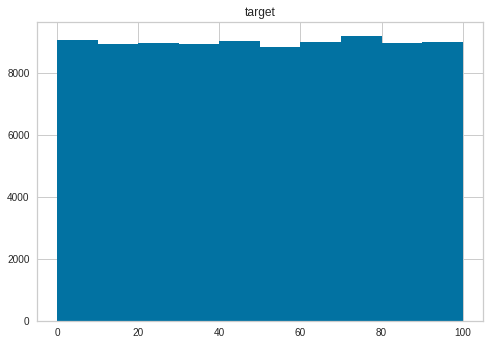

In [7]:
df.hist(column='target')

Based on the above analysis, the target values are uniformly distributed from 0 to ~100.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

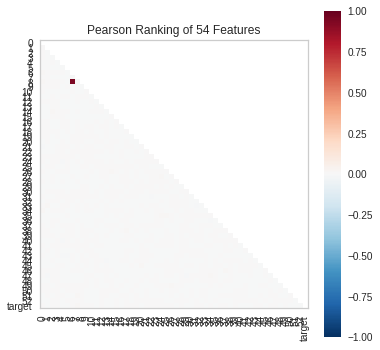

<AxesSubplot:title={'center':'Pearson Ranking of 54 Features'}>

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(features=df.columns, algorithm="pearson")
pcv.fit(df, df.target)
pcv.transform(df)
pcv.poof()

In [10]:
def correlated_columns(df, threshold=0.95):
  return (df.corr().pipe(
      lambda df1: pd.DataFrame(
            np.tril(df1, k=-1),
            columns=df.columns,
            index=df.columns,))
  .stack()
  .rename("pearson")
  .pipe(
      lambda s: s[s.abs() > threshold].reset_index())
  .query("level_0 not in level_1"))

In [11]:
correlated_columns(df)

,level_0,level_1,pearson


Based on plot above, current dataset with no correlation between the features in the data. Non-linear relationships between the features and the target variable.




In [12]:
df = df.dropna(axis = 0)

<AxesSubplot:>

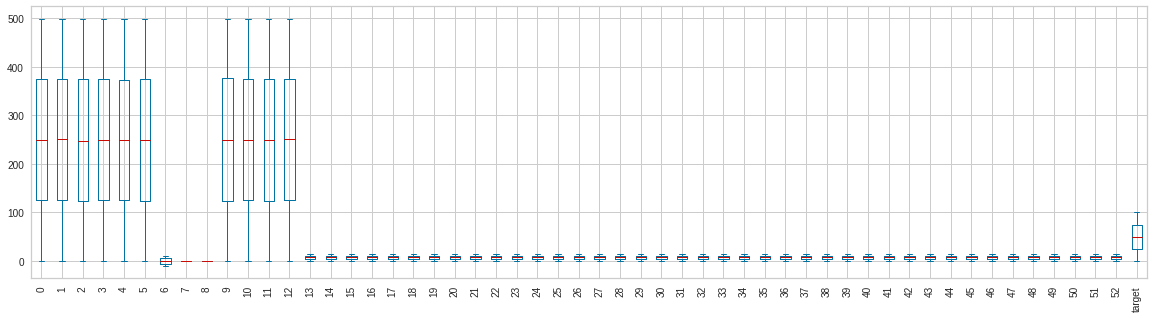

In [13]:
df.plot.box(figsize=(20,5), rot=90)

Based on plot above dataset need to normalize for  bring all the features to a similar scale, which can help improve the performance of many machine learning algorithms, particularly those that are sensitive to the scale of the features

In [14]:
X = df.drop(['target'], axis=1)
y = df['target'].astype(int)

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

**Data Preparation**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Creation, Training, and Evaluation**





Because of non-linear elationships between the features and the target variable we can try to apply  tree-boosted algorithm such as XGBoost. XGBClassifier can capture non-linear relationships between the features and the target variable, even when there is no correlation between the features. Also XGBClassifier is robust to outliers and noisy data, which can be present even when there is no correlation between the features. It can still find patterns in the data and make accurate predictions.

In [16]:
pipe = Pipeline([("scl", StandardScaler()), ('clf', XGBClassifier(max_depth=6, n_estimators=150))])
pipe.fit(X_train, y_train)


In [19]:
y_pred_xgb = pipe.predict(X_test)

In [20]:
print(f'RMSE: {mean_squared_error(y_test, y_pred_xgb, squared = False):.3f}\n')

RMSE: 0.000



It seems we have quite good results after applying the XGBoost algorithm

In [25]:
# Predict hidden data
df_hidden = pd.read_csv ('internship_hidden_test.csv')

y_pred = pipe.predict(df_hidden)
df_hidden['prediction'] = y_pred

df.to_csv('hidden_test_with_predictions.csv', index=False)
     